In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

# Hands-on Activity 9.1: Sampling Estimates of the Cumulative Distribution Function

## Objectives

- To estimate cummulative distribution function.

## Estimating the cumulative distribution function

We would like to estimate the cummulative distribution function of $Y=g(X)$:
$$
F(y) = p(Y\le y) = p(g(X) \le y).
$$
The key is to observe that it can be written as an expectation using the indicator function:
$$
F(y) = \mathbb{E}[1_{[-\infty,y]}(g(X))].
$$
This suggests that we should consider the random variables $1_{-[\infty,y]}(g(X_1)), 1_{-[\infty,y]}(g(X_2)),\dots$ which are independent and identically distributed.
By the strong law of large numbers, we have that:
$$
\bar{F}_N(y) = \frac{1}{N}\sum_{i=1}^N1_{[-\infty,y]}(g(X_i))\rightarrow F(y)\;\text{a.s.}.
$$
This estimate is called the empirical CDF.
Note the neat interpretation:
$$
\bar{F}_N(y) = \frac{1}{N}\sum_{i=1}^N1_{[-\infty,y]}(g(X_i))=\frac{\text{number of }g(X_i) \le y}{N}.
$$

### Example: 1D CDF
We will continue using the 1D test function of Example 3.4 of Robert & Casella (2004).
Assume that $X\sim U([0,1])$ and pick:
$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

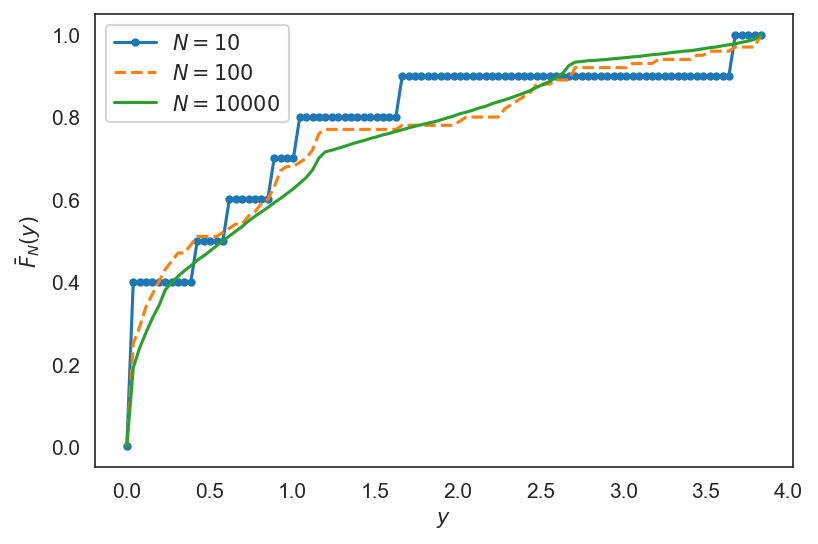

In [2]:
# define the function here:
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# We will not write code for the empirical CDF as it is already
# https://www.statsmodels.org/stable/generated/statsmodels.distributions.empirical_distribution.ECDF.html
from statsmodels.distributions.empirical_distribution import ECDF

# Maximum number of samples to take
max_n = 10000 
# Generate samples from X
x_samples = np.random.rand(max_n)
# Get the corresponding Y's
y_samples = g(x_samples)

# Build ECDF with 10 samples
ecdf_10 = ECDF(y_samples[:10])

# Build ECDF with 50 samples
ecdf_100 = ECDF(y_samples[:100])

# Build ECDF with all samples
ecdf_all = ECDF(y_samples)

# Make the plot
fig, ax = plt.subplots(dpi=150)
# Points on which to evaluate the CDF's
ys = np.linspace(y_samples.min(), y_samples.max(), 100)
ax.plot(ys, ecdf_10(ys), '.-', label='$N=10$')
ax.plot(ys, ecdf_100(ys), '--', label='$N=100$')
ax.plot(ys, ecdf_all(ys), label='$N={0:d}$'.format(max_n))
ax.set_xlabel('$y$')
ax.set_ylabel(r'$\bar{F}_N(y)$')
plt.legend(loc='best');

Let's now use the empirical CDF to find the probability of that $Y$ takes specific values.
For example, let's find the probability that $Y$ is between $1$ and $3$.
We have:
$$
p(1\le Y\le 3) = F(3) - F(1) \approx \bar{F}_N(3) - \bar{F}_N(1).
$$
Let's calculate this numerically for various choices of $N$:

In [ ]:
# Estimate of the probability with 10 samples:
p_Y_in_set_10 = ecdf_10(3.0) - ecdf_10(1.0)
print('N = {0:d}:\t\tp(1 <= Y <= 3) ~= {1:1.2f}'.format(10, p_Y_in_set_10))
# Estimate of the probability with 100 samples:
p_Y_in_set_100 = ecdf_100(3.0) - ecdf_100(1.0)
print('N = {0:d}:\tp(1 <= Y <= 3) ~= {1:1.2f}'.format(100, p_Y_in_set_100))
# Estimate of the probability with all 10000 samples:
p_Y_in_set_all = ecdf_all(3.0) - ecdf_all(1.0)
print('N = {0:d}:\tp(1 <= Y <= 3) ~= {1:1.2f}'.format(10000, p_Y_in_set_all))

### Questions

+ Why is the empirical CDF for small $N$ discontinuous?
+ How do you know how many samples you need? For now, just think about it on your own. We will give the answer in lecture 10.
+ Use the best empirical CDF we have constructed so far to find the probability of that $Y$ is in $[0.5, 2]$ or $[3,4]$, i.e., find $p(0.5 \le Y \le 2\;\text{or}\;3\le Y \le 4)$.